Importing Libraries and data

In [62]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import cdist
import seaborn as sns 

#recover data
input_data_path = '../data_through_notes/' # Relative path to data folder from notebooks folder
reduced_df = pd.read_csv(os.path.join(input_data_path, 'reduced_data.csv'))
y = pd.read_csv(os.path.join(input_data_path, 'y_processed.csv'))
y=y.iloc[:,0]
print("Loaded reduced_data shape:", reduced_df.shape)
print("Loaded y shape:", y.shape)

Loaded reduced_data shape: (297, 12)
Loaded y shape: (297,)


Applying k_means cluster  (elbow method to determine K). 

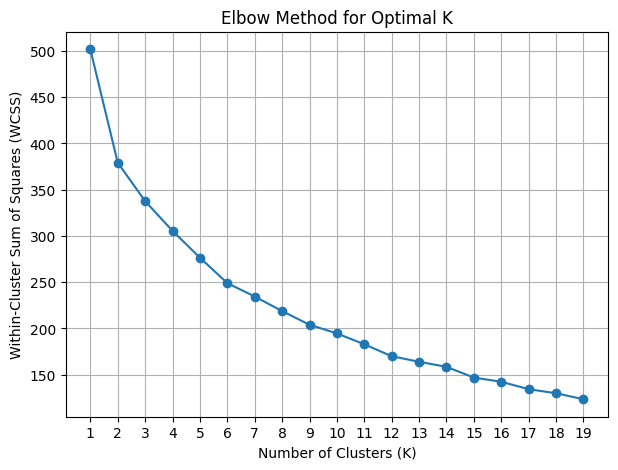

Visualizing k-means clusterring using first 2 features: 



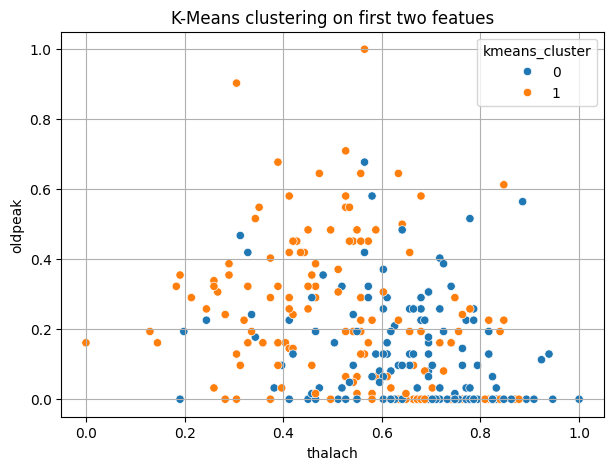

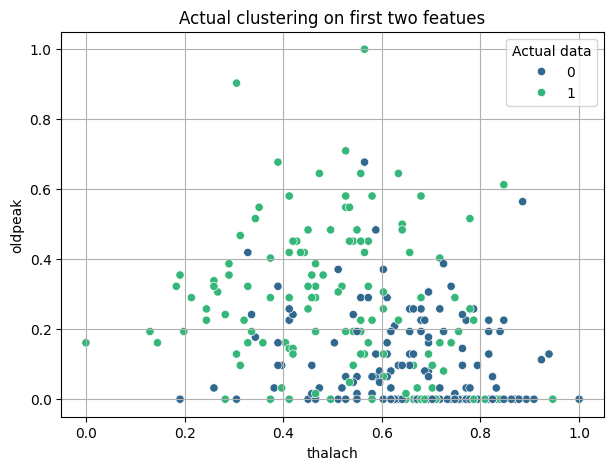

In [66]:
#trying clustering from k=1 to k=20
WCSS=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,n_init=10,random_state=42)
  kmeans.fit(reduced_df)
  WCSS.append(kmeans.inertia_)

#Plotting elbow to choose optimal k
plt.figure(figsize=(7,5))
plt.plot(range(1,20),WCSS,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1,20))
plt.grid(True)
plt.show()


#------Comparing Optimal k means labels with  actual labels
optimal_k=2

kmeans_model=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
Kmeans_label=kmeans_model.fit_predict(reduced_df)

#add cluster data to original data
X_clustterd_kmeans=reduced_df.copy()
X_clustterd_kmeans['kmeans_cluster']=Kmeans_label
X_clustterd_kmeans['Actual data']=y
print(f'Visualizing k-means clusterring using first 2 features: \n')

#pltotting comparsion between first two features using k-means cluster 
plt.figure(figsize=(7,5))
sns.scatterplot(x=reduced_df.iloc[:,0],y=reduced_df.iloc[:,1],hue='kmeans_cluster',data=X_clustterd_kmeans)
plt.title('K-Means clustering on first two featues')
plt.xlabel(reduced_df.columns[0])
plt.ylabel(reduced_df.columns[1])
plt.grid()
plt.show()
#plotting with between first two features with Actual labels
plt.figure(figsize=(7,5))
sns.scatterplot(x=reduced_df.iloc[:,0],y=reduced_df.iloc[:,1],hue='Actual data',data=X_clustterd_kmeans,palette='viridis')
plt.title('Actual clustering on first two featues')
plt.xlabel(reduced_df.columns[0])
plt.ylabel(reduced_df.columns[1])
plt.grid()
plt.show()

#Store k-means results
unsupervised_results={
  'K-Means_Labels' : Kmeans_label,
  'K-Means_Model' :kmeans_model
}

Hierarchical Clustering (dendrogram analysis). 

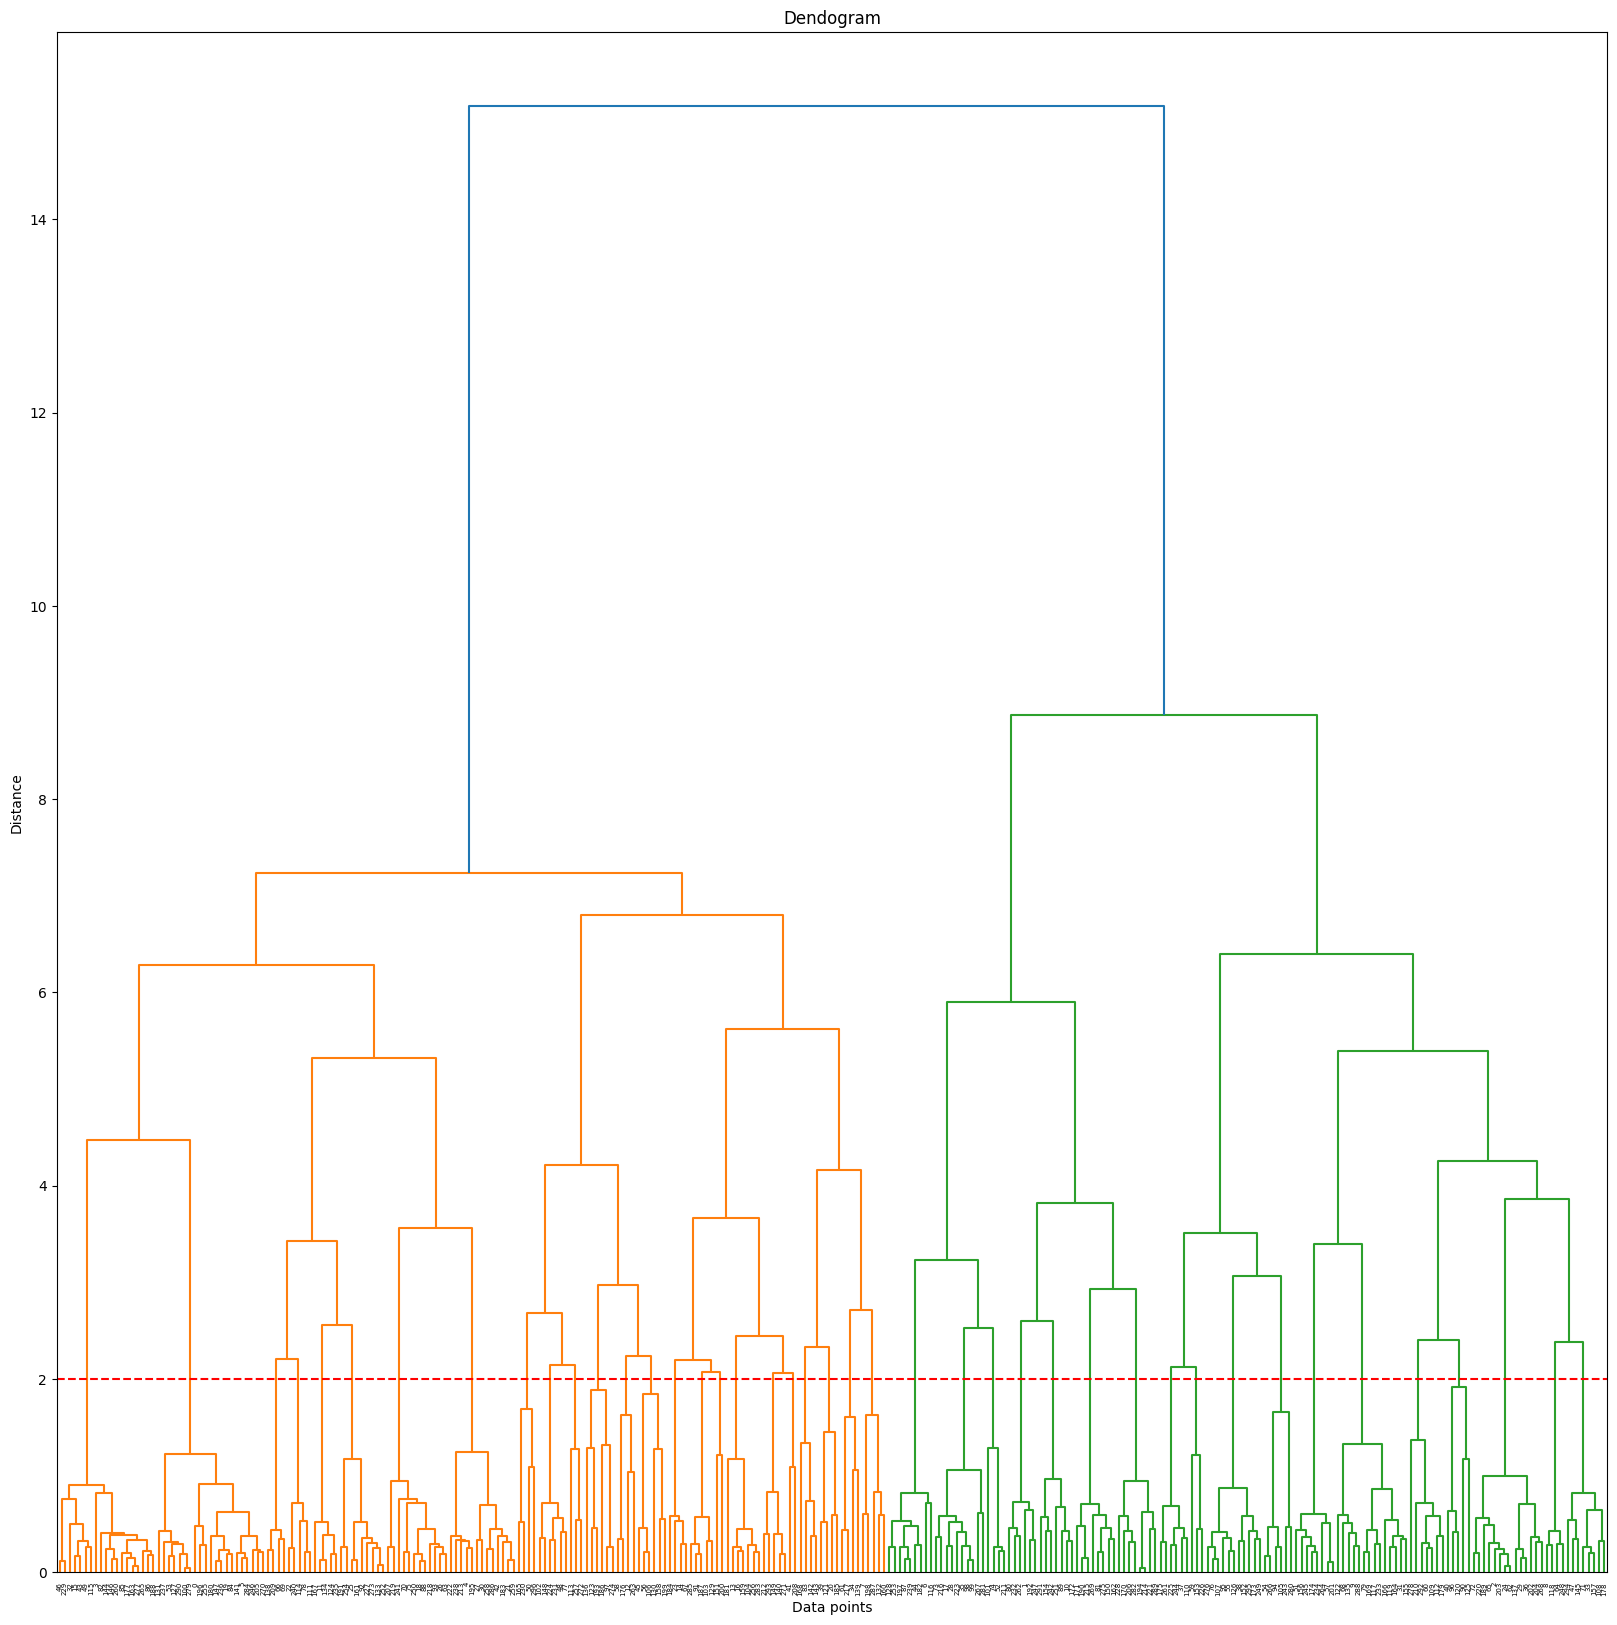

Clusters using hierarchial clustering : 
 [1 2 2 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 2 1 2 1 2 2
 2 2 1 2 1 1 1 2 1 1 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 2
 2 1 2 1 1 2 2 2 1 1 1 1 1 2 1 2 2 1 1 1 2 2 2 1 2 2 1 2 1 1 1 2 1 2 2 2 2
 1 2 1 1 1 2 2 2 2 2 1 2 1 1 2 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 2 2 2 2 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 1 1
 1 1 1 1 2 2 1 2 1 2 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 1 2 2
 1 2 1 2 2 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 2 2 1 2 2 2 1 2 1 2 1 1 1 1 1
 1 1 2 2 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 2 2 1 2 2 1 2 2
 1]


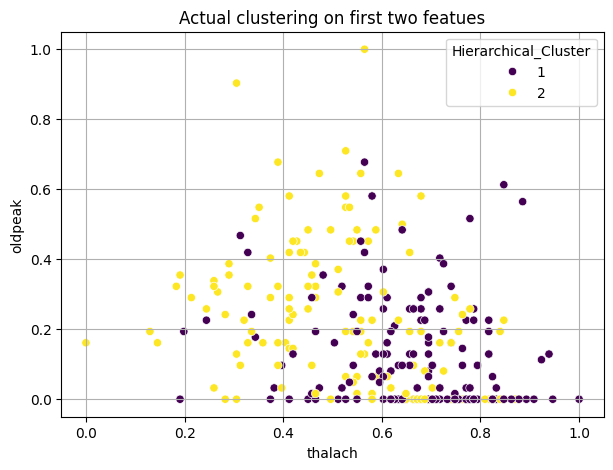

In [ ]:
#importing Libraries
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

#Generating linkage matrix and dendogram
linkage_matrix=linkage(reduced_df,method='ward')
plt.figure(figsize=(20,20))
dendrogram(linkage_matrix)
plt.title('Dendogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.axhline(y=2,color='r',linestyle='--')
plt.show()

#Cutting dendograms to create cluster
clusters=fcluster(linkage_matrix,t=2,criterion='maxclust')
print(f'Clusters using hierarchial clustering : \n {clusters}')

X_clustterd_hierarchial=reduced_df.copy()
X_clustterd_hierarchial['Hierarchical_Cluster']=clusters
X_clustterd_hierarchial['Actual_target']=y

plt.figure(figsize=(7,5))
sns.scatterplot(x=reduced_df.iloc[:,0],y=reduced_df.iloc[:,1],hue='Hierarchical_Cluster',data=X_clustterd_hierarchial,palette='viridis')
plt.title('Hierarchial clustering(k=2) on first two featues')
plt.xlabel(reduced_df.columns[0])
plt.ylabel(reduced_df.columns[1])
plt.grid()
plt.show()